In [1]:
!pip install -r https://raw.githubusercontent.com/datamllab/automl-in-action-notebooks/master/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.5 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0r

In [2]:
import tensorflow as tf

tf.random.set_seed(42)


## Load data


In [3]:
# Import the dataset loading function from sklearn
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
house_dataset = fetch_california_housing()

# Display the oringal data
house_dataset.keys()

# Import pandas package to format the data
import pandas as pd

# Extract features with their names into the a dataframe format
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)

# Extract target with their names into a pd.Series object with name MEDV
target = pd.Series(house_dataset.target, name="MEDV")

# Visualize the first 5 samples of the data
data.head(5)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
# Split data into training and test dataset
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(
    data, target, test_size=0.2, random_state=42
)

# Check the shape of whole dataset and the splited training and test set
print("--Shape of the whole data--\n {}".format(data.shape))
print("\n--Shape of the target vector--\n {}".format(target.shape))
print("\n--Shape of the training data--\n {}".format(train_data.shape))
print("\n--Shape of the testing data--\n {}".format(test_data.shape))


--Shape of the whole data--
 (20640, 8)

--Shape of the target vector--
 (20640,)

--Shape of the training data--
 (16512, 8)

--Shape of the testing data--
 (4128, 8)


In [5]:
train_data.shape, test_data.shape


((16512, 8), (4128, 8))

In [6]:
train_data


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


## Data Preparation: normalization


In [7]:

def norm(x, mean, std):
    return (x - mean) / std


mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

normed_train_data = norm(train_data, mean, std)
normed_test_data = norm(test_data, mean, std)


## Build up an MLP


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=[8]),
        layers.Dense(64, activation="relu"),
        layers.Dense(1),
    ]
)

# Now try out the model. Take a batch of 5 examples from the training data and call model.predict on it.
example_batch = normed_train_data[:5]
example_result = model.predict(example_batch)
example_result


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


array([[-0.3760716 ],
       [-0.54332685],
       [-0.3497369 ],
       [-0.47705022],
       [-0.29703078]], dtype=float32)

In [9]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Customize the optimizer configuration (learning rate here)
optimizer = tf.keras.optimizers.RMSprop(0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])


### Train & test the model


In [11]:
model.fit(normed_train_data, train_targets, epochs=300, batch_size=1024, verbose=1)


Epoch 1/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2627 - mae: 1.0652 - mse: 2.2627
Epoch 2/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6520 - mae: 0.5904 - mse: 0.6520
Epoch 3/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5556 - mae: 0.5333 - mse: 0.5556
Epoch 4/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5119 - mae: 0.5170 - mse: 0.5119
Epoch 5/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5235 - mae: 0.5207 - mse: 0.5235
Epoch 6/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4326 - mae: 0.4750 - mse: 0.4326
Epoch 7/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4906 - mae: 0.5023 - mse: 0.4906
Epoch 8/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4313 - mae: 0.4738 - mse: 0.4313
Epoch 9/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4022 - mae: 0.4535 - mse: 0.4022
Epoch 10/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3872 - mae: 0.4470 - mse: 0.3872
Epoch 11/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss:

In [12]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=0)
mse


0.3559347093105316

### Tune the number of epochs


In [13]:
# Train the model (in silent mode, verbose=0)


def build_model():
    model = keras.Sequential(
        [
            layers.Dense(
                64, activation="relu", input_shape=[normed_train_data.shape[1]]
            ),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )
    optimizer = tf.keras.optimizers.RMSprop(0.01)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])
    return model


model = build_model()

EPOCHS = 500
history = model.fit(
    normed_train_data,
    train_targets,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=1024,
    verbose=1,
)


Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6277 - mae: 1.1695 - mse: 2.6277 - val_loss: 0.7282 - val_mae: 0.6397 - val_mse: 0.7282
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6771 - mae: 0.6003 - mse: 0.6771 - val_loss: 0.7538 - val_mae: 0.6082 - val_mse: 0.7538
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6307 - mae: 0.5834 - mse: 0.6307 - val_loss: 0.5302 - val_mae: 0.5575 - val_mse: 0.5302
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5271 - mae: 0.5239 - mse: 0.5271 - val_loss: 0.5816 - val_mae: 0.5324 - val_mse: 0.5816
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5240 - mae: 0.5282 - mse: 0.5240 - val_loss: 0.4722 - val_mae: 0.5235 - val_mse: 0.4722
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4752 - mae: 0.4934 - mse: 0.4752 - val_loss: 0.5022 - val_mae: 0.4946 - val_mse: 0.5022
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4796 - mae: 0.5031 - mse: 0.4796 - val_loss: 0.4553

In [14]:
import pandas as pd

hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.162738,0.285018,0.162738,0.342961,0.376443,0.342961,495
496,0.169716,0.290587,0.169716,0.334795,0.382595,0.334795,496
497,0.161595,0.284422,0.161595,0.365417,0.380281,0.365417,497
498,0.166626,0.289220,0.166626,0.334304,0.380746,0.334304,498
499,0.163688,0.285999,0.163688,0.340889,0.377427,0.340889,499


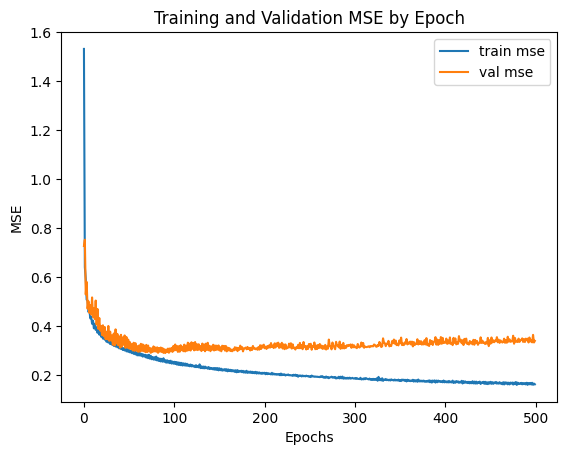

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist["epoch"], hist["mse"], label="train mse")
plt.plot(hist["epoch"], hist["val_mse"], label="val mse")
plt.xlabel("Epochs")
plt.ylabel("MSE")
# Set a title of the current axes.
plt.title("Training and Validation MSE by Epoch")
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


In [16]:
import numpy as np


def smooth_curve(values, std=5):
    # gaussian smoothing: Smooths a list of values by convolving with a gussian.
    width = std * 4
    x = np.linspace(-width, width, 2 * width + 1)
    kernel = np.exp(-((x / 5) ** 2))

    values = np.array(values)
    weights = np.ones_like(values)

    smoothed_values = np.convolve(values, kernel, mode="same")
    smoothed_weights = np.convolve(weights, kernel, mode="same")

    return smoothed_values / smoothed_weights



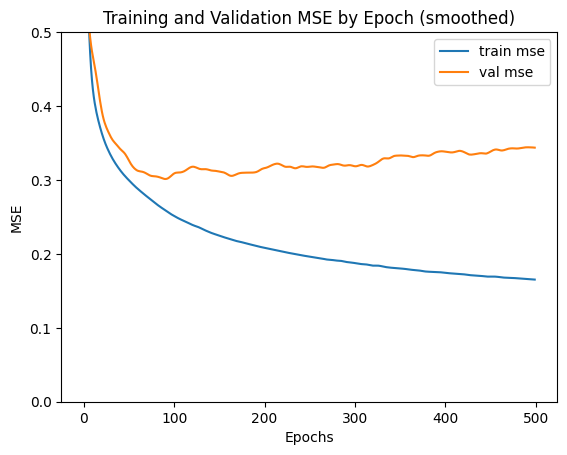

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist["epoch"], smooth_curve(hist["mse"]), label="train mse")
plt.plot(hist["epoch"], smooth_curve(hist["val_mse"]), label="val mse")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim((0, 0.5))
# Set a title of the current axes.
plt.title("Training and Validation MSE by Epoch (smoothed)")
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


## Final fit model with full data & test model


In [18]:
model = build_model()
model.fit(normed_train_data, train_targets, epochs=150, batch_size=1024, verbose=1)


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0024 - mae: 1.0209 - mse: 2.0024
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6386 - mae: 0.5840 - mse: 0.6386
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5624 - mae: 0.5389 - mse: 0.5624 
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5285 - mae: 0.5287 - mse: 0.5285
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4221 - mae: 0.4675 - mse: 0.4221
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4419 - mae: 0.4769 - mse: 0.4419
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4394 - mae: 0.4800 - mse: 0.4394
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4173 - mae: 0.4636 - mse: 0.4173
Epoch 9/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3868 - mae: 0.4475 - mse: 0.3868
Epoch 10/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4220 - mae: 0.4631 - mse: 0.4220
Epoch 11/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3938 - 

In [19]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=0)
mse


0.3062283396720886

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


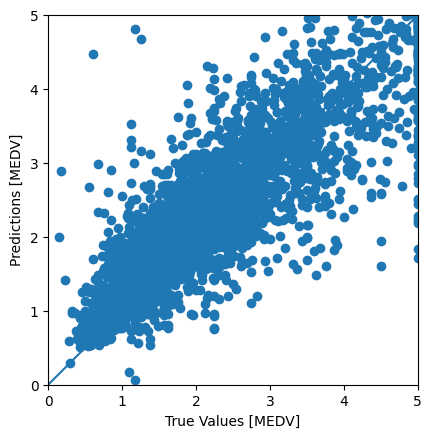

In [21]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect="equal")
plt.scatter(test_targets, test_predictions)
plt.xlabel("True Values [MEDV]")
plt.ylabel("Predictions [MEDV]")
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
